In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [6]:
# Meier z0 function
def meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop):
    cd1_param = 7.5 # constant in Ra92
    vkc = 0.4 # kappa in paper, von Karman constant
    z0mv = []
    for i,vai in enumerate(SAI):
        lt = np.maximum(1e-5, vai)
        displa = htop * (1.0 - (1.0 - np.exp(-(cd1_param * lt)**0.5)) / (cd1_param * lt)**0.5)
        
        lt = np.minimum(lt, z0v_LAImax)
        delt = 2.0
            
        # Initial U_ustar computation
        U_ustar_ini = ((z0v_Cs + z0v_Cr * lt * 0.5)**(-0.5) * z0v_c * lt * 0.25)
        U_ustar = U_ustar_ini
        
        # Iterative computation of U_ustar
        while delt > 1e-4:
            U_ustar_prev = U_ustar
            U_ustar = U_ustar_ini * np.exp(U_ustar_prev)
            delt = abs(U_ustar - U_ustar_prev)
    
        # Final U_ustar adjustment
        U_ustar = 4.0 * U_ustar / lt / z0v_c
        
        # Final z0mv computation
        z0mv.append((htop * (1.0 - displa / htop) * np.exp(-vkc * U_ustar + np.log(z0v_cw) - 1.0 + z0v_cw**(-1.0)))) # (7) (meters)

    return np.array(z0mv) # (m)

### Needleleaf forest

In [31]:
cd1_param = 7.5 # constant in Ra92
htop =  4 # canopy height (m)
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
z0v_LAImax = 4.55
z0v_Cs = 0.003 # Drag coefficient of the ground in the absence of vegetation ()
z0v_Cr = 0.05 # drag coefficient of an isolated roughness element ()
z0v_c =  0.09 # empirical constant in Ra92 ()
z0v_cw = 9 # empirical constant >1

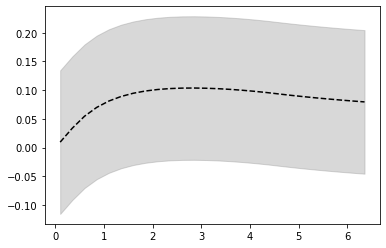

In [14]:
SAI = np.arange(0.1,6.5,0.25)
z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
plt.plot(SAI,z0/htop,c='k',linestyle='--')
plt.fill_between(SAI, (z0-0.5)/htop, (z0+0.5)/htop, color='grey', alpha=0.3, label='Shaded Area')


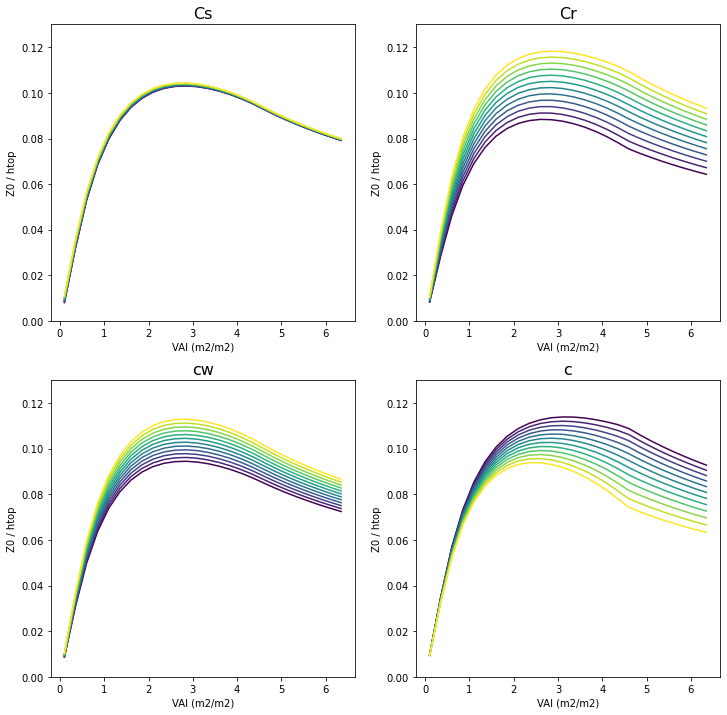

In [34]:
plt.figure(figsize=(12,12))
cmap = cm.viridis 
norm = Normalize(vmin=0, vmax=11)
SAI = np.arange(0.1,6.5,0.25)

plt.subplot(2,2,1)
for i,Cs in enumerate(np.linspace(z0v_Cs*0.9,z0v_Cs*1.1,12)):
    z0 = meier_z0(SAI,Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cs',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

plt.subplot(2,2,2)
for i,Cr in enumerate(np.linspace(z0v_Cr*0.9,z0v_Cr*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cr',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

plt.subplot(2,2,3)
for i,cw in enumerate(np.linspace(z0v_cw*0.9,z0v_cw*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('cw',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

plt.subplot(2,2,4)
for i,c in enumerate(np.linspace(z0v_c*0.9,z0v_c*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('c',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

plt.savefig('meier_paramuncertainty_NLevergreenTree_10%.png')

### Broadleaf forest

In [35]:
cd1_param = 7.5 # constant in Ra92
htop =  5 # canopy height (m)
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
z0v_LAImax = 7.87
z0v_Cs = 0.01 # Drag coefficient of the ground in the absence of vegetation ()
z0v_Cr = 0.14 # drag coefficient of an isolated roughness element ()
z0v_c =  0.01 # empirical constant in Ra92 ()
z0v_cw = 3 # empirical constant >1


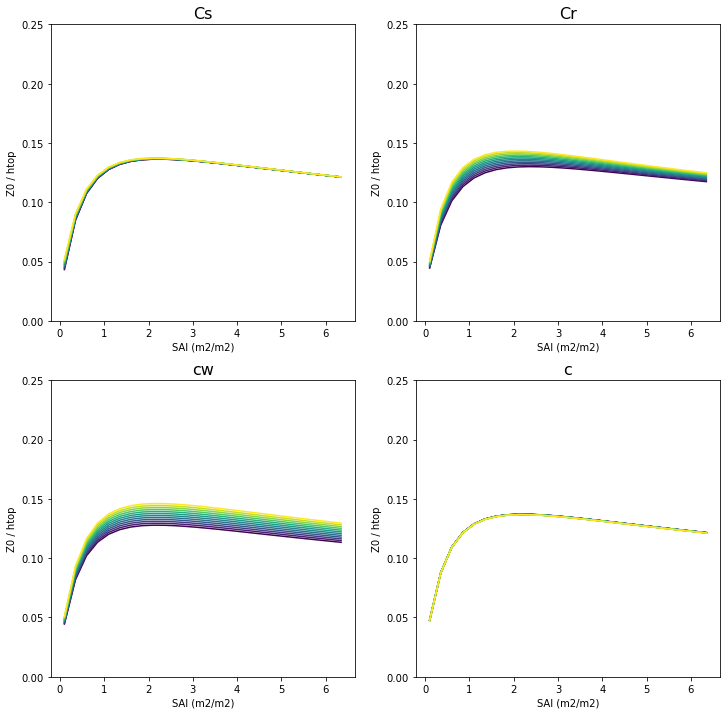

In [36]:
plt.figure(figsize=(12,12))
cmap = cm.viridis 
norm = Normalize(vmin=0, vmax=11)
SAI = np.arange(0.1,6.5,0.25)

plt.subplot(2,2,1)
for i,Cs in enumerate(np.linspace(z0v_Cs*0.9,z0v_Cs*1.1,12)):
    z0 = meier_z0(SAI,Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cs',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

plt.subplot(2,2,2)
for i,Cr in enumerate(np.linspace(z0v_Cr*0.9,z0v_Cr*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cr',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

plt.subplot(2,2,3)
for i,cw in enumerate(np.linspace(z0v_cw*0.9,z0v_cw*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('cw',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

plt.subplot(2,2,4)
for i,c in enumerate(np.linspace(z0v_c*0.9,z0v_c*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('c',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

plt.savefig('meier_paramuncertainty_BLevergreenforest_10%.png')

### Deciduous broadleaf forest

In [37]:
cd1_param = 7.5 # constant in Ra92
htop =  5 # canopy height (m)
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
z0v_LAImax = 8.88
z0v_Cs = 0.013 # Drag coefficient of the ground in the absence of vegetation ()
z0v_Cr = 0.13 # drag coefficient of an isolated roughness element ()
z0v_c =  0.06 # empirical constant in Ra92 ()
z0v_cw = 1 # empirical constant >1


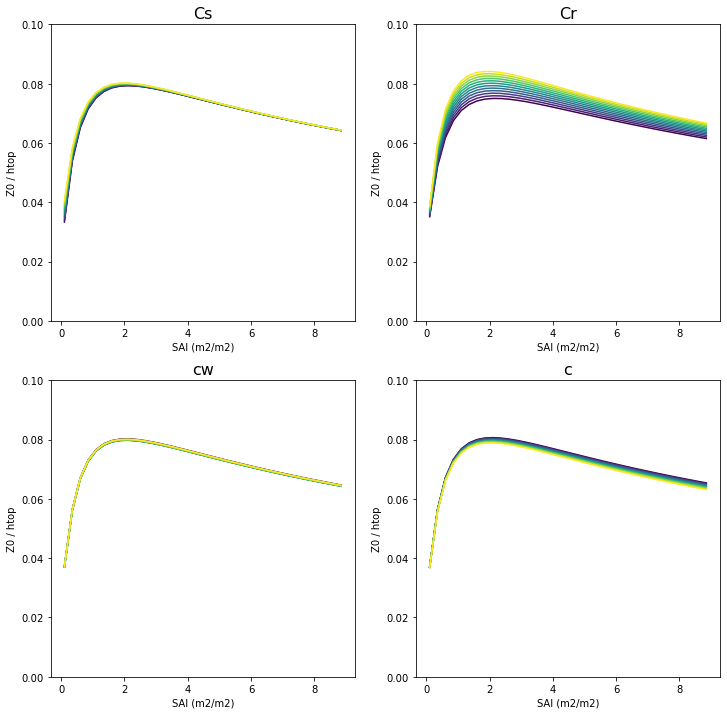

In [38]:
plt.figure(figsize=(12,12))
cmap = cm.viridis 
norm = Normalize(vmin=0, vmax=11)
SAI = np.arange(0.1,9,0.25)

plt.subplot(2,2,1)
for i,Cs in enumerate(np.linspace(z0v_Cs*0.9,z0v_Cs*1.1,12)):
    z0 = meier_z0(SAI,Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cs',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.1])

plt.subplot(2,2,2)
for i,Cr in enumerate(np.linspace(z0v_Cr*0.9,z0v_Cr*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cr',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.1])

plt.subplot(2,2,3)
for i,cw in enumerate(np.linspace(z0v_cw*0.9,z0v_cw*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('cw',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.1])

plt.subplot(2,2,4)
for i,c in enumerate(np.linspace(z0v_c*0.9,z0v_c*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('c',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.1])

plt.savefig('meier_paramuncertainty_BLdecidTree_10%.png')

### Shrubland

In [39]:
cd1_param = 7.5 # constant in Ra92
htop =  1 # canopy height (m)
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
z0v_LAImax = 3.07
z0v_Cs = 0.001 # Drag coefficient of the ground in the absence of vegetation ()
z0v_Cr = 0.06 # drag coefficient of an isolated roughness element ()
z0v_c =  0.12 # empirical constant in Ra92 ()
z0v_cw = 20 # empirical constant >1


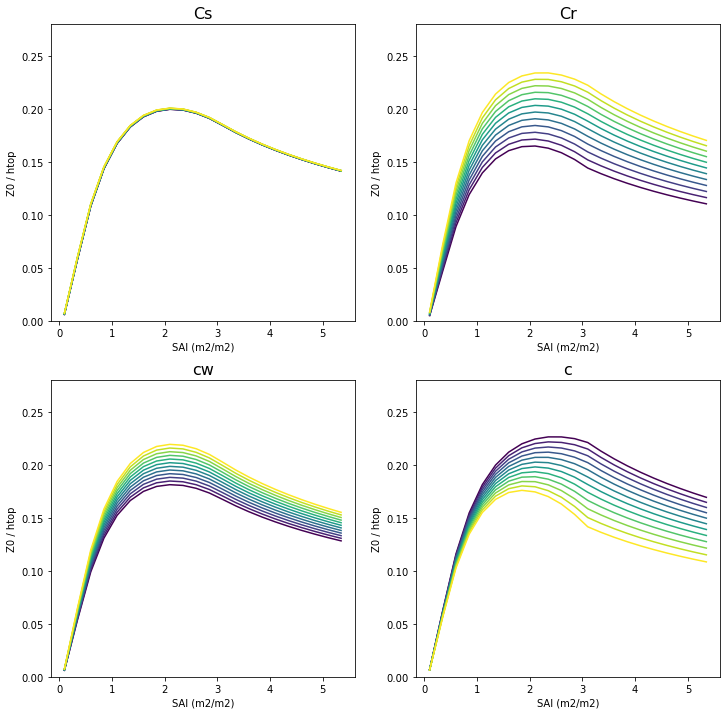

In [40]:
plt.figure(figsize=(12,12))
cmap = cm.viridis 
norm = Normalize(vmin=0, vmax=11)
SAI = np.arange(0.1,5.5,0.25)

plt.subplot(2,2,1)
for i,Cs in enumerate(np.linspace(z0v_Cs*0.9,z0v_Cs*1.1,12)):
    z0 = meier_z0(SAI,Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cs',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.28])

plt.subplot(2,2,2)
for i,Cr in enumerate(np.linspace(z0v_Cr*0.9,z0v_Cr*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cr',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.28])

plt.subplot(2,2,3)
for i,cw in enumerate(np.linspace(z0v_cw*0.9,z0v_cw*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('cw',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.28])

plt.subplot(2,2,4)
for i,c in enumerate(np.linspace(z0v_c*0.9,z0v_c*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('c',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.28])

plt.savefig('meier_paramuncertainty_shrubs_10%.png')

### Grassland

In [41]:
cd1_param = 7.5 # constant in Ra92
htop =  0.5 # canopy height (m)
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
z0v_LAImax = 4.61
z0v_Cs = 0.001 # Drag coefficient of the ground in the absence of vegetation ()
z0v_Cr = 0.04 # drag coefficient of an isolated roughness element ()
z0v_c =  0.08 # empirical constant in Ra92 ()
z0v_cw = 19 # empirical constant >1


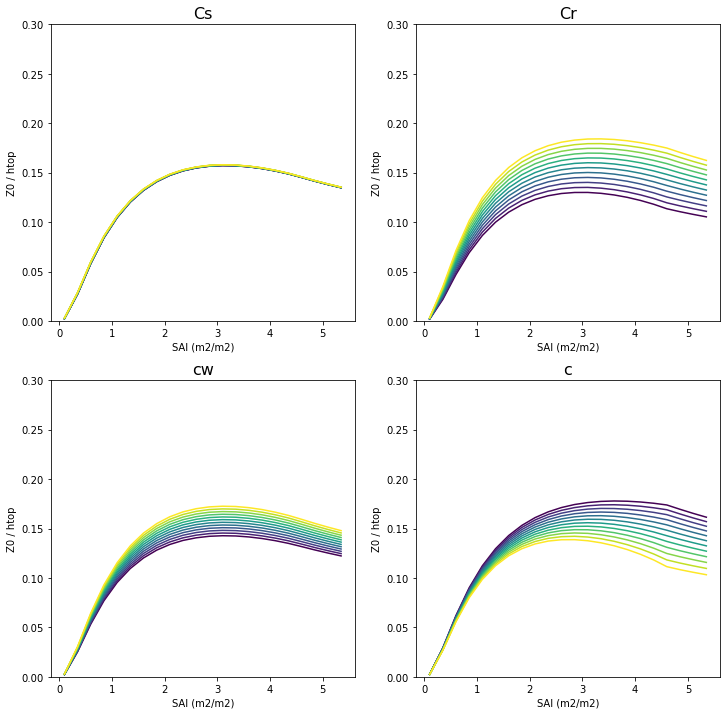

In [42]:
plt.figure(figsize=(12,12))
cmap = cm.viridis 
norm = Normalize(vmin=0, vmax=11)
SAI = np.arange(0.1,5.5,0.25)

plt.subplot(2,2,1)
for i,Cs in enumerate(np.linspace(z0v_Cs*0.9,z0v_Cs*1.1,12)):
    z0 = meier_z0(SAI,Cs,z0v_Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cs',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])

plt.subplot(2,2,2)
for i,Cr in enumerate(np.linspace(z0v_Cr*0.9,z0v_Cr*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,Cr,z0v_cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('Cr',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])

plt.subplot(2,2,3)
for i,cw in enumerate(np.linspace(z0v_cw*0.9,z0v_cw*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,cw,z0v_c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('cw',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])

plt.subplot(2,2,4)
for i,c in enumerate(np.linspace(z0v_c*0.9,z0v_c*1.1,12)):
    z0 = meier_z0(SAI,z0v_Cs,z0v_Cr,z0v_cw,c,z0v_LAImax,htop)
    plt.plot(SAI,z0/htop,color=cmap(norm(i)))
plt.title('c',fontsize=16)
plt.xlabel('SAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])

plt.savefig('meier_paramuncertainty_grass_10%.png')

### LHC sampling NL

In [9]:
from skopt.space import Space
from skopt.sampler import Lhs

In [56]:
# define parameters
cd1_param = 7.5 # constant in Ra92
vkc = 0.4 # kappa in paper, von Karman constant

# needleleaf evergreen forest
params_NL = {
    "z0v_Cs": 0.003,
    "z0v_Cr": 0.05,
    "z0v_c": 0.09,
    "z0v_cw": 9
}

params_BL = {
    "z0v_Cs" : 0.01, 
    "z0v_Cr" : 0.14, 
    "z0v_c" :  0.01, 
    "z0v_cw" : 3
}

params_DBL = {
    "z0v_Cs" : 0.013,
    "z0v_Cr" : 0.13,
    "z0v_c" :  0.06, 
    "z0v_cw" : 1
}

params_SH = {
    "z0v_Cs" : 0.001, 
    "z0v_Cr" : 0.06, 
    "z0v_c" :  0.12, 
    "z0v_cw" : 20
}

params_GR = {
    "z0v_Cs" : 0.001, 
    "z0v_Cr" : 0.04, 
    "z0v_c" :  0.08, 
    "z0v_cw" : 19 
}

In [43]:
def get_lhc(params,n_samples):
    bounds = [(value - 0.1 * value, value + 0.1 * value) for value in params.values()]
    space = Space(bounds)
    lhs = Lhs(lhs_type="classic", criterion=None)
    lhc = lhs.generate(space.dimensions, n_samples)

    return lhc

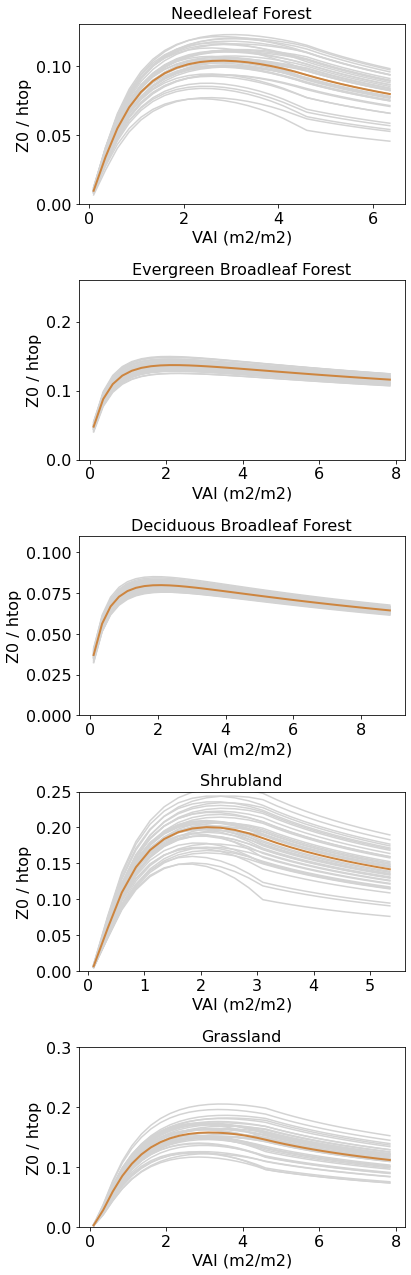

In [63]:
plt.figure(figsize=(6,18))
plt.rcParams['font.size'] = 16

# Needleleaf forest
plt.subplot(5,1,1)
VAI = np.arange(0.1,6.5,0.25)
htop =  4 
z0v_LAImax = 4.55
lhc = get_lhc(params_NL,n_samples)
for i in range(n_samples):
    z0 = meier_z0(VAI,lhc[i][0],lhc[i][1],lhc[i][3],lhc[i][2],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_NL['z0v_Cs'],params_NL['z0v_Cr'],params_NL['z0v_cw'],params_NL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Needleleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

# Evergreen Broadleaf forest 
plt.subplot(5,1,2)
VAI = np.arange(0.1,8,0.25)
htop =  5 # canopy height (m)
z0v_LAImax = 7.87
lhc = get_lhc(params_BL,n_samples)
for i in range(n_samples):
    z0 = meier_z0(VAI,lhc[i][0],lhc[i][1],lhc[i][3],lhc[i][2],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_BL['z0v_Cs'],params_BL['z0v_Cr'],params_BL['z0v_cw'],params_BL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Evergreen Broadleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.26])

# Deciduous broadleaf forest
plt.subplot(5,1,3)
VAI = np.arange(0.1,9,0.25)
htop =  5 
z0v_LAImax = 8.88
lhc = get_lhc(params_DBL,n_samples)
for i in range(n_samples):
    z0 = meier_z0(VAI,lhc[i][0],lhc[i][1],lhc[i][3],lhc[i][2],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_DBL['z0v_Cs'],params_DBL['z0v_Cr'],params_DBL['z0v_cw'],params_DBL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Deciduous Broadleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.11])

# Shrubland
plt.subplot(5,1,4)
VAI = np.arange(0.1,5.5,0.25)
htop =  1 
z0v_LAImax = 3.07
lhc = get_lhc(params_SH,n_samples)
for i in range(n_samples):
    z0 = meier_z0(VAI,lhc[i][0],lhc[i][1],lhc[i][3],lhc[i][2],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_SH['z0v_Cs'],params_SH['z0v_Cr'],params_SH['z0v_cw'],params_SH['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Shrubland',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

# Grassland
plt.subplot(5,1,5)
VAI = np.arange(0.1,8,0.25)
htop =  0.5 
z0v_LAImax = 4.61
lhc = get_lhc(params_GR,n_samples)
for i in range(n_samples):
    z0 = meier_z0(VAI,lhc[i][0],lhc[i][1],lhc[i][3],lhc[i][2],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_GR['z0v_Cs'],params_GR['z0v_Cr'],params_GR['z0v_cw'],params_GR['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Grassland',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])


plt.tight_layout()
plt.savefig('meier_paramuncertainty_LHC_10%.png')

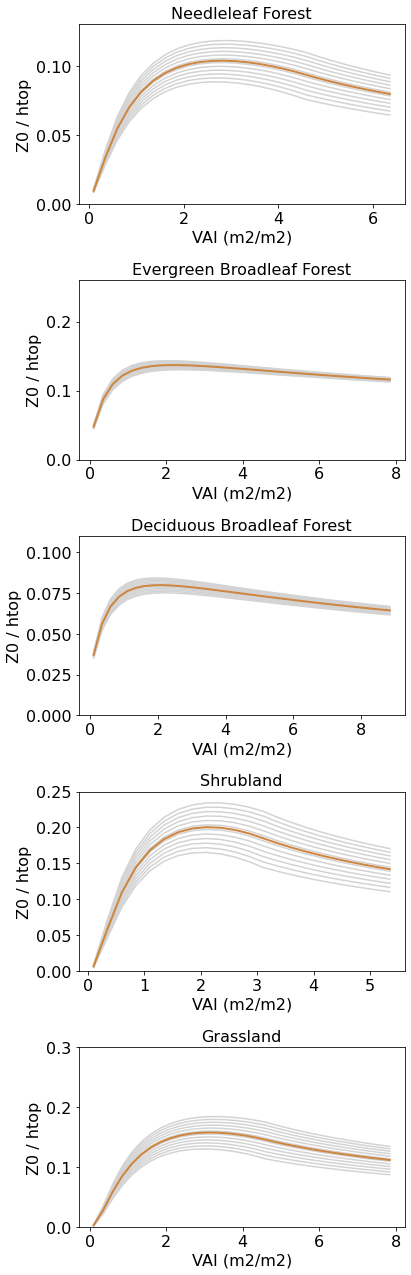

In [65]:
# z0v_Cr only

plt.figure(figsize=(6,18))
plt.rcParams['font.size'] = 16

# Needleleaf forest
plt.subplot(5,1,1)
VAI = np.arange(0.1,6.5,0.25)
htop =  4 
z0v_LAImax = 4.55
lhc = get_lhc(params_NL,n_samples)
for i,Cr in enumerate(np.linspace(params_NL['z0v_Cr']*0.9,params_NL['z0v_Cr']*1.1,12)):
    z0 = meier_z0(VAI,params_NL['z0v_Cs'],Cr,params_NL['z0v_cw'],params_NL['z0v_c'],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_NL['z0v_Cs'],params_NL['z0v_Cr'],params_NL['z0v_cw'],params_NL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Needleleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.13])

# Evergreen Broadleaf forest 
plt.subplot(5,1,2)
VAI = np.arange(0.1,8,0.25)
htop =  5 # canopy height (m)
z0v_LAImax = 7.87
lhc = get_lhc(params_BL,n_samples)
for i,Cr in enumerate(np.linspace(params_BL['z0v_Cr']*0.9,params_BL['z0v_Cr']*1.1,12)):
    z0 = meier_z0(VAI,params_BL['z0v_Cs'],Cr,params_BL['z0v_cw'],params_BL['z0v_c'],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_BL['z0v_Cs'],params_BL['z0v_Cr'],params_BL['z0v_cw'],params_BL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Evergreen Broadleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.26])

# Deciduous broadleaf forest
plt.subplot(5,1,3)
VAI = np.arange(0.1,9,0.25)
htop =  5 
z0v_LAImax = 8.88
lhc = get_lhc(params_DBL,n_samples)
for i,Cr in enumerate(np.linspace(params_DBL['z0v_Cr']*0.9,params_DBL['z0v_Cr']*1.1,12)):
    z0 = meier_z0(VAI,params_DBL['z0v_Cs'],Cr,params_DBL['z0v_cw'],params_DBL['z0v_c'],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_DBL['z0v_Cs'],params_DBL['z0v_Cr'],params_DBL['z0v_cw'],params_DBL['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Deciduous Broadleaf Forest',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.11])

# Shrubland
plt.subplot(5,1,4)
VAI = np.arange(0.1,5.5,0.25)
htop =  1 
z0v_LAImax = 3.07
lhc = get_lhc(params_SH,n_samples)
for i,Cr in enumerate(np.linspace(params_SH['z0v_Cr']*0.9,params_SH['z0v_Cr']*1.1,12)):
    z0 = meier_z0(VAI,params_SH['z0v_Cs'],Cr,params_SH['z0v_cw'],params_SH['z0v_c'],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_SH['z0v_Cs'],params_SH['z0v_Cr'],params_SH['z0v_cw'],params_SH['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Shrubland',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.25])

# Grassland
plt.subplot(5,1,5)
VAI = np.arange(0.1,8,0.25)
htop =  0.5 
z0v_LAImax = 4.61
lhc = get_lhc(params_GR,n_samples)
for i,Cr in enumerate(np.linspace(params_GR['z0v_Cr']*0.9,params_GR['z0v_Cr']*1.1,12)):
    z0 = meier_z0(VAI,params_GR['z0v_Cs'],Cr,params_GR['z0v_cw'],params_GR['z0v_c'],z0v_LAImax,htop)
    plt.plot(VAI,z0/htop,color='lightgrey')
z0 = meier_z0(VAI,params_GR['z0v_Cs'],params_GR['z0v_Cr'],params_GR['z0v_cw'],params_GR['z0v_c'],z0v_LAImax,htop)
plt.plot(VAI,z0/htop,c='peru',linestyle='-',linewidth=2)
plt.title('Grassland',fontsize=16)
plt.xlabel('VAI (m2/m2)')
plt.ylabel('Z0 / htop')
plt.ylim([0,0.3])


plt.tight_layout()
plt.savefig('meier_paramuncertainty_Cr_10%.png')